# Calculate Total Absorptance

This example uses piecewise linear functions for spectral irradiance $e_\lambda(\lambda)$ and spectral absorptance $\alpha(\lambda)$. The curves are not representing any real irradiance or absorptance. They are just simplifying examples. 

Both functions are listed at a few points only (aka "data points"). We assume that between the data points a linear interpolation is an appropriate model since we do not know the exact behavior between the known data points.



For tutorial see: https://numpy.org/doc/stable/reference/generated/numpy.interp.html


In [13]:
import numpy as np
import matplotlib.pyplot as plt

In [14]:
# sampling points: x-values  at with all functions are evaluated / sampled:
xs = np.arange(0.,1200.0001,10) # wavelengths in nm

In [15]:
# Known data points of absorptance
alpha_xp = np.array([0., 400., 500., 700., 900., 1200.])
alpha_yp = np.array([0.,   0.,  0.6,  0.6,   0.,    0.])

# Linear ínterpolation (our model) / "sampling" 
alpha_xs = xs
alpha_ys = np.interp(alpha_xs, alpha_xp, alpha_yp)

In [16]:
# Known data points of irradiance
e_lambda_xp =     np.array([0.,300., 500., 600., 900., 1100., 1200.])
e_lambda_yp = 2.0*np.array([0.,  0.,  1.0,  1.0,  0.2,    0.,    0.])

# Linear ínterpolation (our model) / "sampling"  
e_lambda_xs = xs
e_lambda_ys = np.interp(e_lambda_xs, e_lambda_xp, e_lambda_yp)

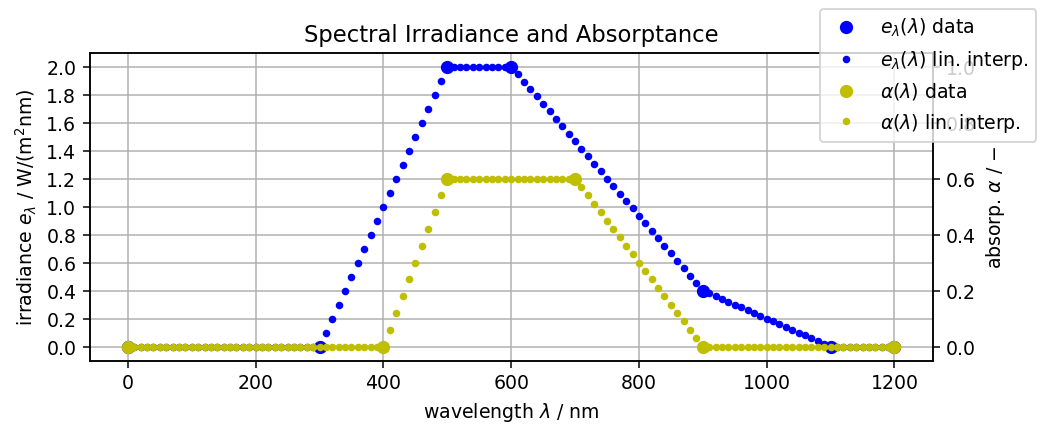

In [17]:
# Create figure canvas and one subplot denoted as "axis"
fig1, ax1 = plt.subplots(figsize=(8,3), dpi = 136)

ax1.set_title("Spectral Irradiance and Absorptance")

# Secondary axis for different phys. quantity and unit
ax12 = ax1.twinx()

# Plot spectral irradiance data points
ax1.plot(e_lambda_xp, e_lambda_yp, "bo", label = r"$e_\lambda(\lambda)$ data")

# Plot spectral irradiance sampling points of linear interpolation model 
ax1.plot(e_lambda_xs, e_lambda_ys, "b.", label = r"$e_\lambda(\lambda)$ lin. interp.")

ax1.set_ylim(-0.1, 2.1)
ax1.set_yticks(np.arange(0,2.001,0.2))
ax1.set_ylabel(r"irradiance $e_\lambda$ / $\mathrm{W/(m^2 nm)}$")

ax1.set_xlabel(r"wavelength $\lambda$ / nm")
ax1.grid(True)


# Plot spectral absorptance data points
ax12.plot(alpha_xp, alpha_yp, "yo", label = r"$\alpha(\lambda)$ data")

# Plot spectral absorptance sampling points of linear interpolation model 
ax12.plot(alpha_xs, alpha_ys, "y.", label = r"$\alpha(\lambda)$ lin. interp.")

ax12.set_ylim(-0.05, 1.05)
ax12.set_yticks(np.arange(0,1.001,0.2))
ax12.set_ylabel(r"absorp. $\alpha$ / $-$")

fig1.legend()

plt.show()

## Total Absorptance

The spectral absorptance is a kind of efficiency between 0% and 100%. It tells you how much of the incoming energy (or more precisely the radiant flux density in W/(m²nm)) is absorbed (converted to useful energy) for a given wavelength.

The totally absorbed power density (W/m²) is the product $\alpha e_\lambda$ integrated (summed up) over the total wavelength range:

$$ 
p_\mathrm{abs} = \int_0^\infty \alpha e_\lambda d\lambda
$$

This tells you how much of the incoming power density (or energy) is absorbed. 


In [18]:
# Calculate product alpha * e_lambda and integrate
prod_ys = alpha_ys * e_lambda_ys
prod_xs = xs
p_abs = np.trapz(prod_ys, prod_xs)
print(f"Absorped power density: p_abs = {p_abs:.1f} W/m^2")

Absorped power density: p_abs = 340.8 W/m^2


The total absorptance relates this number to the available incoming energy: Which percentage of the available energy or power is absorbed and transformed into usable energy. The incoming power density is the total irrandiance: 

$$
p_\mathrm{in} = \int_0^\infty e_\lambda d\lambda
$$


In [19]:
# Calculate total incomping power desity
p_in = np.trapz(e_lambda_ys, e_lambda_xs)
print(f"p_in = {p_in:.1f} W/m^2")

p_in = 800.0 W/m^2



The total absorptance reads:
$$ 
\alpha_T = \frac{p_\mathrm{abs}}{p_\mathrm{in}} 
$$


In [20]:
# Calculate total absorptance, i.e. the percentage of absorped incoming power
alpha_T = p_abs/p_in
print(f"Total Absorptance: alpha_T = {alpha_T*100:.1f} %") 

Total Absorptance: alpha_T = 42.6 %


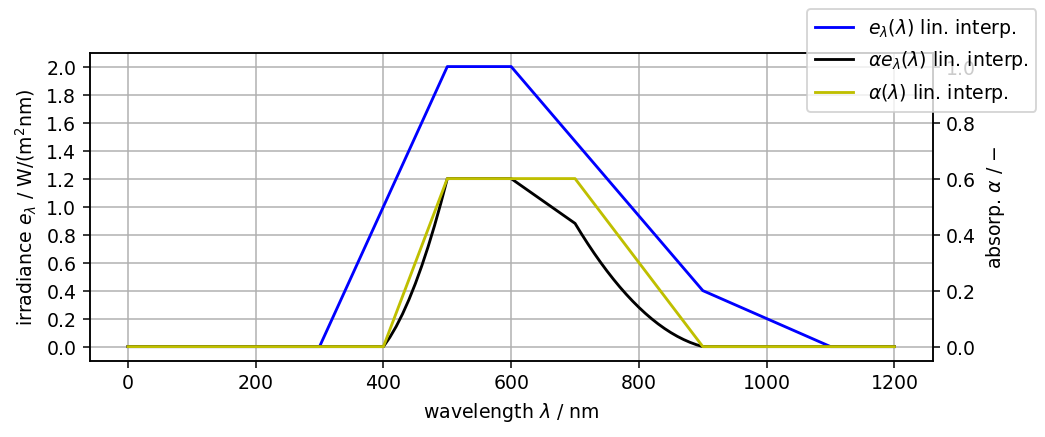

In [21]:
# Create figure canvas and one subplot denoted as "axis"
fig2, ax2 = plt.subplots(figsize=(8,3), dpi = 136)

ax1.set_title("Spectral Irradiance and Absorptance")

# Secondary axis for different phys. quantity and unit
ax22 = ax2.twinx()

# Plot spectral absorptance sampling points of linear interpolation model 
ax22.plot(alpha_xs, alpha_ys, "y-", label = r"$\alpha(\lambda)$ lin. interp.")

ax22.set_ylim(-0.05, 1.05)
ax22.set_yticks(np.arange(0,1.001,0.2))
ax22.set_ylabel(r"absorp. $\alpha$ / $-$")

# Plot spectral irradiance data points
##ax2.plot(e_lambda_xp, e_lambda_yp, "bo", label = r"$e_\lambda(\lambda)$ data")
ax2.plot(e_lambda_xs, e_lambda_ys, "b-", label = r"$e_\lambda(\lambda)$ lin. interp.")
ax2.plot(prod_xs, prod_ys, "k-", label = r"$\alpha e_\lambda(\lambda)$ lin. interp.")

# Plot spectral irradiance sampling points of linear interpolation model 
ax2.set_ylim(-0.1, 2.1)
ax2.set_yticks(np.arange(0,2.001,0.2))
ax2.set_ylabel(r"irradiance $e_\lambda$ / $\mathrm{W/(m^2 nm)}$")

ax2.set_xlabel(r"wavelength $\lambda$ / nm")

ax2.grid(True)

# Plot spectral absorptance data points
##ax22.plot(alpha_xp, alpha_yp, "yo", label = r"$\alpha(\lambda)$ data")



fig2.legend()

plt.show()